# Reinforcement Learning Solution to the Towers of Hanoi Puzzle

Yibo Xu

For this assignment, you will use reinforcement learning to solve the [Towers of Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi) puzzle with three pegs and five disks.

To accomplish this, you must modify the code discussed in lecture for learning to play Tic-Tac-Toe.  Modify the code  so that it learns to solve the five-disk, three-peg
Towers of Hanoi Puzzle.  In some ways, this will be simpler than the
Tic-Tac-Toe code.  

Steps required to do this include the following:

  - Represent the state and move, and use it as a tuple as a key to the Q dictionary.
  - Make sure only valid moves are tried from each state.
  - Assign reinforcement of $1$ to each move, even for the move that results in the goal state.

Make a plot of the number of steps required to reach the goal for each
trial.  Each trial starts from the same initial state.  Decay epsilon
as in the Tic-Tac-Toe code.

## Requirements

First, how should we represent the state of this puzzle?  We need to keep track of which disks are on which pegs. Name the disks 1, 2, 3, 4, and 5, with 1 being the smallest disk and 5 being the largest. The set of disks on a peg can be represented as a list of integers.  Then the state can be a list of three lists.

For example, the starting state with all disks being on the left peg would be `[[1, 2, 3, 4, 5], [], []]`.  After moving disk 1 to peg 2, we have `[[2, 3, 4, 5], [1], []]`.

To represent that move we just made, we can use a list of two peg numbers, like `[1, 2]`, representing a move of the top disk on peg 1 to peg 2.

Now on to some functions. Define at least the following functions. Examples showing required output appear below.

   - `print_state(state)`: prints the state in the form shown below
   - `get_valid_moves(state)`: returns list of moves that are valid from `state`
   - `make_move(state, move)`: returns new (copy of) state after move has been applied.
   - `train_Q(n_repetitions, learning_rate, epsilon_decay_factor, get_valid_moves, make_move)`: train the Q function for number of repetitions, decaying epsilon at start of each repetition. Returns Q and list or array of number of steps to reach goal for each repetition.
   - `test_Q(Q, max_steps, get_valid_moves, make_move)`: without updating Q, use Q to find greedy action each step until goal is found. Return path of states.

A function that you might choose to implement is

   - `state_move_tuple(state, move)`: returns tuple of state and move.  
    
This is useful for converting state and move to a key to be used for the Q dictionary.

Show the code and results for testing each function.  Then experiment with various values of `n_repetitions`, `learning_rate`, and `epsilon_decay_factor` to find values that work reasonably well, meaning that eventually the minimum solution path of 31 steps is found consistently.

Make a plot of the number of steps in the solution path versus number of repetitions. The plot should clearly show the number of steps in the solution path eventually reaching the minimum of 31 steps, though the decrease will not be monotonic.  Also plot a horizontal, dashed line at a height (value on  y axis) of 31 to show the optimal path length.

Use at least a total of 15 sentences to describe the following results:
- Add markdown cells in which you describe the Q learning algorithm and your implementation of Q learning as applied to the Towers of Hanoi problem.
- Add code cells to examine several Q values from the start state with different moves and discuss if the Q values  make sense. 
- Also add code cells to examine several Q values from one or two states that are two steps away from the goal and discuss if these Q values make sense.

In [15]:
import copy as cp
import numpy as np
import random

In [89]:
def print_state(state):
    printState = cp.deepcopy(state)
    for s in printState:
        while len(s) < 5:
            s.insert(0, " ")
    
    for i in range(5):
        print(printState[0][i], end = " ")
        print(printState[1][i], end = " ")
        print(printState[2][i], end = " ")
        print("")
    print("-----")    

In [90]:
def state_move_tuple(state, move):
    state = cp.deepcopy(state)
    for i in range(0,3):
        state[i] = tuple(state[i])
    return (tuple(state), tuple(move))


In [91]:
state = [[1, 2, 3, 4, 5], [], []]
print_state(state)

1     
2     
3     
4     
5     
-----


In [92]:
move =[1, 2]  # Move top (smallest) disk from first peg to second peg

state_move_tuple(state, move)

(((1, 2, 3, 4, 5), (), ()), (1, 2))

In [93]:
def get_valid_moves(state):
    results = []
    for i in range(0,3):
        for j in range(0,3):
            if i != j:
                if len(state[i]) != 0: 
                    if len(state[j]) == 0: 
                        results.append([i+1,j+1])
                    elif state[j][0] > state[i][0]: 
                        results.append([i+1,j+1])
    return results
   

In [94]:
def make_move(state, move):
    state = cp.deepcopy(state)
    state[move[1]-1].insert(0,state[move[0]-1].pop(0))
    return state

In [95]:
new_state = make_move(state, move)
new_state

[[2, 3, 4, 5], [1], []]

In [96]:
get_valid_moves(new_state)

[[1, 3], [2, 1], [2, 3]]

In [97]:
print_state(new_state)

      
2     
3     
4     
5 1   
-----


In [155]:
import numpy as np
def epsilonGreedy(epsilon, Q, state):
    moveList = get_valid_moves(state)
    if np.random.uniform() < epsilon:
        choice = np.random.choice(range(len(moveList)))
        return moveList[choice]
    else:
        statesAndMovesTuples = [state_move_tuple(state, move) for move in moveList]
        Qs = np.array([Q.get(tup, 0) for tup in statesAndMovesTuples])
        return moveList[np.argmin(Qs)]

In [156]:
def train_Q(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF, showMoves = False):
    Q = {}
    numberSteps = []
    epsilon = 1.0
    for trial in range(nRepetitions):
        epsilon *= epsilonDecayFactor
        step = 0
        state = [[1,2,3,4,5],[],[]] 
        done = False
        
        while not done:
            step += 1 
            move = epsilonGreedy(epsilon, Q, state)
            newState = makeMoveF(state, move)
            Tup = state_move_tuple(state, move)
            newTup = state_move_tuple(newState, move)
            #print(step, newTup)
            if Tup not in Q:
                Q[Tup] = 0 #initiallizes unseen Qs
            
            if newState == [[],[],[1,2,3,4,5]]: #this means we found the solution.
                if showMoves:
                    print("Found solution in " + str(step))
                Q[Tup] = 1
                Q[newTup] = 0
                done = True
                numberSteps.append(step)
            
            if step > 1: 
                Q[(state_move_tuple(stateOld, moveOld))] += learningRate * (1 + Q[Tup] -
                                                                         Q[state_move_tuple(stateOld, moveOld)])
            
            #set old variables
            stateOld, moveOld = state, move
            state = newState
    return Q, numberSteps

In [157]:
def test_Q(Q, maxSteps, validMovesF, makeMoveF):
    state = [[1,2,3,4,5],[],[]]
    path = []
    path.append(state)
    for i in range(maxSteps):
        state = make_move(state, epsilonGreedy(0, Q, state)) # 0 ensures we always take greedy Q
        path.append(state)
        if state == [[],[],[1,2,3,4,5]]:
            return path

In [158]:
Q, steps_to_goal = train_Q(200, 0.5, 0.7, get_valid_moves, make_move)

# Examples

In [159]:
state = [[1, 2, 3, 4, 5], [], []]
print_state(state)

1     
2     
3     
4     
5     
-----


In [160]:
move =[1, 2]  # Move top (smallest) disk from first peg to second peg

state_move_tuple(state, move)

(((1, 2, 3, 4, 5), (), ()), (1, 2))

In [161]:
new_state = make_move(state, move)
new_state

[[2, 3, 4, 5], [1], []]

In [162]:
get_valid_moves(new_state)

[[1, 3], [2, 1], [2, 3]]

In [163]:
print_state(new_state)

      
2     
3     
4     
5 1   
-----


In [164]:
steps_to_goal

[1055,
 1035,
 3201,
 1454,
 246,
 731,
 594,
 202,
 731,
 594,
 155,
 233,
 263,
 202,
 518,
 184,
 597,
 150,
 142,
 273,
 270,
 387,
 160,
 270,
 132,
 135,
 425,
 143,
 192,
 160,
 609,
 181,
 438,
 110,
 143,
 378,
 255,
 101,
 177,
 339,
 103,
 70,
 194,
 493,
 122,
 121,
 299,
 89,
 150,
 391,
 76,
 138,
 271,
 49,
 152,
 97,
 97,
 392,
 114,
 86,
 228,
 85,
 421,
 44,
 117,
 219,
 91,
 153,
 36,
 74,
 142,
 261,
 64,
 74,
 57,
 280,
 46,
 93,
 98,
 232,
 97,
 50,
 205,
 177,
 42,
 68,
 56,
 102,
 334,
 66,
 134,
 70,
 42,
 68,
 87,
 123,
 45,
 36,
 68,
 61,
 52,
 116,
 46,
 46,
 195,
 95,
 38,
 40,
 42,
 134,
 48,
 34,
 35,
 162,
 82,
 59,
 32,
 41,
 65,
 94,
 97,
 39,
 32,
 35,
 41,
 61,
 259,
 41,
 93,
 31,
 31,
 47,
 36,
 34,
 40,
 33,
 32,
 34,
 31,
 169,
 31,
 31,
 68,
 31,
 31,
 146,
 31,
 31,
 288,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,


In [165]:
path = test_Q(Q, 100, get_valid_moves, make_move)

In [166]:
path

[[[1, 2, 3, 4, 5], [], []],
 [[2, 3, 4, 5], [], [1]],
 [[3, 4, 5], [2], [1]],
 [[3, 4, 5], [1, 2], []],
 [[4, 5], [1, 2], [3]],
 [[1, 4, 5], [2], [3]],
 [[1, 4, 5], [], [2, 3]],
 [[4, 5], [], [1, 2, 3]],
 [[5], [4], [1, 2, 3]],
 [[5], [1, 4], [2, 3]],
 [[2, 5], [1, 4], [3]],
 [[1, 2, 5], [4], [3]],
 [[1, 2, 5], [3, 4], []],
 [[2, 5], [3, 4], [1]],
 [[5], [2, 3, 4], [1]],
 [[5], [1, 2, 3, 4], []],
 [[], [1, 2, 3, 4], [5]],
 [[1], [2, 3, 4], [5]],
 [[1], [3, 4], [2, 5]],
 [[], [3, 4], [1, 2, 5]],
 [[3], [4], [1, 2, 5]],
 [[3], [1, 4], [2, 5]],
 [[2, 3], [1, 4], [5]],
 [[1, 2, 3], [4], [5]],
 [[1, 2, 3], [], [4, 5]],
 [[2, 3], [], [1, 4, 5]],
 [[3], [2], [1, 4, 5]],
 [[3], [1, 2], [4, 5]],
 [[], [1, 2], [3, 4, 5]],
 [[1], [2], [3, 4, 5]],
 [[1], [], [2, 3, 4, 5]],
 [[], [], [1, 2, 3, 4, 5]]]

In [167]:
for s in path:
    print_state(s)
    print()

1     
2     
3     
4     
5     
-----

      
2     
3     
4     
5   1 
-----

      
      
3     
4     
5 2 1 
-----

      
      
3     
4 1   
5 2   
-----

      
      
      
4 1   
5 2 3 
-----

      
      
1     
4     
5 2 3 
-----

      
      
1     
4   2 
5   3 
-----

      
      
    1 
4   2 
5   3 
-----

      
      
    1 
    2 
5 4 3 
-----

      
      
      
  1 2 
5 4 3 
-----

      
      
      
2 1   
5 4 3 
-----

      
      
1     
2     
5 4 3 
-----

      
      
1     
2 3   
5 4   
-----

      
      
      
2 3   
5 4 1 
-----

      
      
  2   
  3   
5 4 1 
-----

      
  1   
  2   
  3   
5 4   
-----

      
  1   
  2   
  3   
  4 5 
-----

      
      
  2   
  3   
1 4 5 
-----

      
      
      
  3 2 
1 4 5 
-----

      
      
    1 
  3 2 
  4 5 
-----

      
      
    1 
    2 
3 4 5 
-----

      
      
      
  1 2 
3 4 5 
-----

      
      
      
2 1   
3 4 5 
-----

      
      
1     
2     
3 4 5 

Text(0.5, 1.0, 'Number of Steps vs Number of Repetitions')

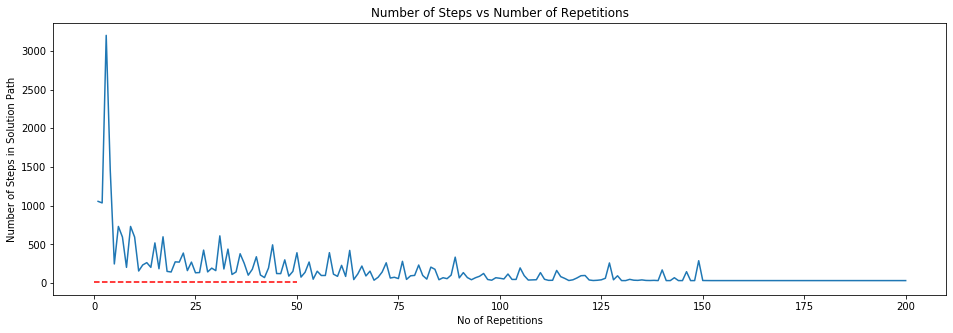

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,5))
x = list(range(1, len(steps_to_goal) + 1)) # x has to be the same size as y
plt.subplot(1,1,1)     
plt.plot(x, steps_to_goal)
plt.hlines(y=7, xmin=0.0, xmax=50.0, color='r', linestyle='dashed')
plt.xlabel('No of Repetitions')
plt.ylabel('Number of Steps in Solution Path')
plt.title('Number of Steps vs Number of Repetitions')

## Experiment 1

First we'll try different epsilon_decay_factor. This uses a loop that tries each each value .1, .2 ... .9 for epsilon.

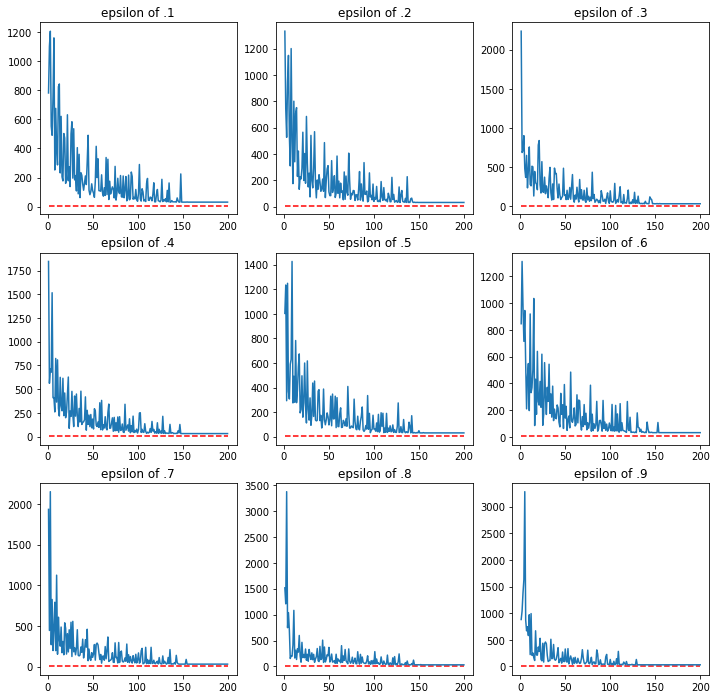

In [169]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotStep(stepsToGoal):
    plt.plot(range(1, len(stepsToGoal) + 1), stepsToGoal)
    plt.hlines(y = 7, xmin = 1, xmax = len(stepsToGoal), linestyle = "--", color = "red")
results = []

for epsilon_decay_factor in np.linspace(0.1, 0.9, 9 ):
    results.append(train_Q(200, 0.5, epsilon_decay_factor, get_valid_moves, make_move))
fig = plt.figure(figsize = (12, 12))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plotStep(results[i - 1][1])
    plt.title("epsilon of ." + str(i))

Then, the learning rate

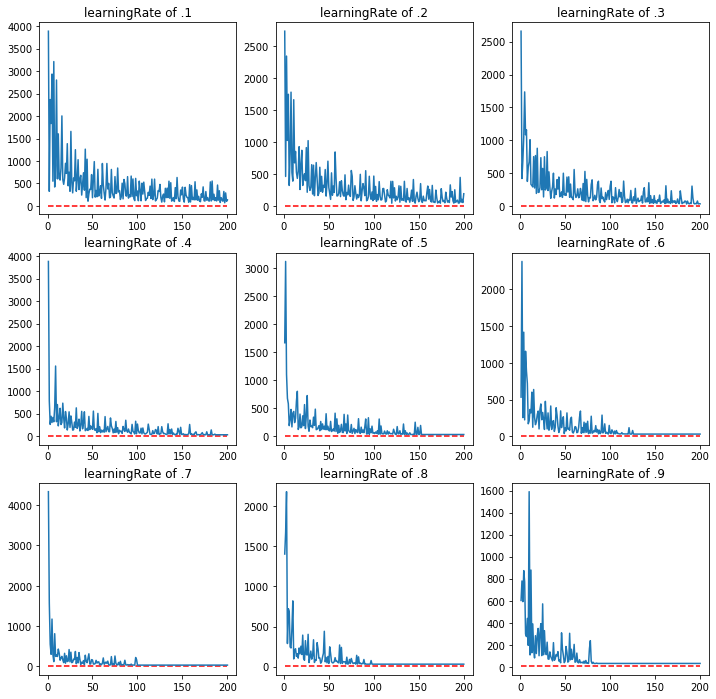

In [170]:
results = []

for learning_rate in np.linspace(0.1, 0.9, 9 ):
    results.append(train_Q(200, learning_rate, 0.7, get_valid_moves, make_move))
fig = plt.figure(figsize = (12, 12))
for i in range(1,10):
    fig.add_subplot(3,3,i)
    plotStep(results[i - 1][1])
    plt.title("learningRate of ." + str(i))

Q-learning is a model-free reinforcement learning algorithm to learn quality of actions telling an agent what action to take under what circumstances.

According to the experiment that we do above, I found that for n_repetitions =200, learning_rate=0.9, and epsilon_decay_factor = 0.2, work reasonably well, meaning that eventually the minimum solution path of 31 steps is found consistently. Although a lower epsilon value will make epsilonGreedy more likely to choose the greedy choice, the way epsilonGreedy deals with unseen Qs leads epsilonGreedy to choose the unseen choice.

In [179]:
state2 = [[1, 2, 3], [4], [5]]
move2 = get_valid_moves(state2)
print_state(state2)
print("we got")
for i in range(len(move2)):
    print(state_move_tuple(state2,move2[i]),Q.get(state_move_tuple(state2,move2[i])))

      
      
1     
2     
3 4 5 
-----
we got
(((1, 2, 3), (4,), (5,)), (1, 2)) 8.988336697308114
(((1, 2, 3), (4,), (5,)), (1, 3)) 8.325659037567675
(((1, 2, 3), (4,), (5,)), (2, 3)) 8.0


That Q value make sense as we know we have minimum solution path of 8 steps from state [[1, 2, 3], [4], [5]], which we can know from above path. The Q we got here is around that number.

In [178]:
state2 = [[1, 2, 3, 4, 5], [], []]
move2 = get_valid_moves(state2)
print_state(state2)
print("we got")
for i in range(len(move2)):
    print(state_move_tuple(state2,move2[i]),Q.get(state_move_tuple(state2,move2[i])))    

1     
2     
3     
4     
5     
-----
we got
(((1, 2, 3, 4, 5), (), ()), (1, 2)) 31.076008047094906
(((1, 2, 3, 4, 5), (), ()), (1, 3)) 30.99999999999489


That q make sense as we know we have minimum solution path of 31 steps from state [[1, 2, 3, 4, 5], [], []]. The q is around that number. According to this, Q value make sense.

In [184]:
state2 = [[1], [2], [3, 4, 5]]
move2 = get_valid_moves(state2)
print_state(state2)
print("we got")
for i in range(len(move2)):
    print(state_move_tuple(state2,move2[i]),Q.get(state_move_tuple(state2,move2[i])))   

      
      
    3 
    4 
1 2 5 
-----
we got
(((1,), (2,), (3, 4, 5)), (1, 2)) 2.4375
(((1,), (2,), (3, 4, 5)), (1, 3)) 2.5859375
(((1,), (2,), (3, 4, 5)), (2, 3)) 2.0


That state, [[1], [2], [3, 4, 5]] ,are two steps away from the goal. That can be proved by the Q values, that is 2.0. According to this, Q values make sense here.

## Extra Credit

In [215]:
state = [[1, 2, 3, 4], [], []]
print_state(state)
print(get_valid_moves(state))

print()

state2 = [[1], [2], [3, 4]]
print_state(state2)
print(get_valid_moves(state2))

      
1     
2     
3     
4     
-----
[[1, 2], [1, 3]]

      
      
      
    3 
1 2 4 
-----
[[1, 2], [1, 3], [2, 3]]


In [216]:
n_repetitions = 200
learning_rate = 0.5
epsilon_decay_factor = 0.9

In [217]:
def train_4Q(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF, showMoves = False):
    Q = {}
    numberSteps = []
    epsilon = 1.0
    for trial in range(nRepetitions):
        epsilon *= epsilonDecayFactor
        step = 0
        state = [[1,2,3,4],[],[]] 
        done = False
        
        while not done:
            step += 1 
            move = epsilonGreedy(epsilon, Q, state)
            newState = makeMoveF(state, move)
            Tup = state_move_tuple(state, move)
            newTup = state_move_tuple(newState, move)
            #print(step, newTup)
            if Tup not in Q:
                Q[Tup] = 0 #initiallizes unseen Qs
            
            if newState == [[],[],[1,2,3,4]]: #this means we found the solution.
                if showMoves:
                    print("Found solution in " + str(step))
                Q[Tup] = 1
                Q[newTup] = 0
                done = True
                numberSteps.append(step)
            
            if step > 1: 
                Q[(state_move_tuple(stateOld, moveOld))] += learningRate * (1 + Q[Tup] -
                                                                         Q[state_move_tuple(stateOld, moveOld)])
            
            #set old variables
            stateOld, moveOld = state, move
            state = newState
    return Q, numberSteps

Q, steps_to_goal = train_4Q(200, 0.5, 0.7, get_valid_moves, make_move)

In [218]:
def test_4Q(Q, maxSteps, validMovesF, makeMoveF):
    state = [[1,2,3,4],[],[]]
    path = []
    path.append(state)
    for i in range(maxSteps):
        state = make_move(state, epsilonGreedy(0, Q, state)) # 0 ensures we always take greedy Q
        path.append(state)
        if state == [[],[],[1,2,3,4]]:
            return path

path = test_4Q(Q, 100, get_valid_moves, make_move)
print("It took", len(path), "steps to get the goal")
path

It took 16 steps to get the goal


[[[1, 2, 3, 4], [], []],
 [[2, 3, 4], [1], []],
 [[3, 4], [1], [2]],
 [[3, 4], [], [1, 2]],
 [[4], [3], [1, 2]],
 [[1, 4], [3], [2]],
 [[1, 4], [2, 3], []],
 [[4], [1, 2, 3], []],
 [[], [1, 2, 3], [4]],
 [[], [2, 3], [1, 4]],
 [[2], [3], [1, 4]],
 [[1, 2], [3], [4]],
 [[1, 2], [], [3, 4]],
 [[2], [1], [3, 4]],
 [[], [1], [2, 3, 4]],
 [[], [], [1, 2, 3, 4]]]

In [219]:
for s in path:
    print_state(s)
    print()

      
1     
2     
3     
4     
-----

      
      
2     
3     
4 1   
-----

      
      
      
3     
4 1 2 
-----

      
      
      
3   1 
4   2 
-----

      
      
      
    1 
4 3 2 
-----

      
      
      
1     
4 3 2 
-----

      
      
      
1 2   
4 3   
-----

      
      
  1   
  2   
4 3   
-----

      
      
  1   
  2   
  3 4 
-----

      
      
      
  2 1 
  3 4 
-----

      
      
      
    1 
2 3 4 
-----

      
      
      
1     
2 3 4 
-----

      
      
      
1   3 
2   4 
-----

      
      
      
    3 
2 1 4 
-----

      
      
    2 
    3 
  1 4 
-----

      
    1 
    2 
    3 
    4 
-----



## Grading

Download and extract `A4grader.py` from [A4grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A4grader.tar).

In [220]:
%run -i A4grader.py


======================= Code Execution =======================

['YiboXu-A4.ipynb']
Extracting python code from notebook named 'YiboXu-A4.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing

  state = [[1], [2,3], [4, 5]]
  moves = get_valid_moves(state)


--- 5/5 points. Correctly returned [[1, 2], [1, 3], [2, 3]]

Testing

    state = [[], [], [1, 2, 3, 4, 5]]
    moves = get_valid_moves(state)


--- 5/5 points. Correctly returned [[3, 1], [3, 2]]

Testing

    state = [[], [], [1, 2, 3, 4, 5]]
    new_state = make_move(state, [3, 1])


--- 5/5 points. Correctly returned [[1], [], [2, 3, 4, 5]]

Testing

    state = [[1, 2], [3], [4, 5]]
    new_state = make_move(state, [1, 3])


--- 5/5 points. Correctly returned [[2], [3], [1, 4, 5]]

Testing

    Q, steps = train_Q(1000, 0.5, 0.7, get_valid_moves, make_move)


--- 10/10 points. Correctly returned list of steps that has 1000 elements.

--- 10/10 points. C

<Figure size 432x288 with 0 Axes>

## Extra Credit

Modify your code to solve the Towers of Hanoi puzzle with four pegs and five disks.  Name your functions

    - print_state_4pegs
    - get_valid_moves_4pegs
    - make_move_4pegs

Find values for number of repetitions, learning rate, and epsilon decay factor for which train_Q learns a Q function that test_Q can use to find the shortest solution path.  Include the output from the successful calls to train_Q and test_Q.